In [1]:
import pandas as pd
import seaborn as sns

# Carica il dataset
df = pd.read_csv("../Dataset/dfPlayerTrophies_2025.csv")
df_trophies = df[['rank']].copy()
trophies = df.columns[5:]
df_trophies['trophies'] = df[trophies].notna().sum(axis=1)
display(df_trophies)

,rank,trophies
0,1st,0
1,2nd,1
2,3rd,1
3,1st,2
4,2nd,0
...,...,...
199,2nd,3
200,3rd,1
201,1st,2
202,2nd,2


In [2]:
df_group = df_trophies.groupby("rank").sum()
display(df_group)

,trophies
rank,
1st,65
2nd,47
3rd,53


In [3]:

trophy_columns = df.columns[5:]
results = []

# Per ogni trofeo
for trophy in trophy_columns:
    data = df[df[trophy].notna()]
    if len(data) > 0:
        counts = data['rank'].value_counts()
        results.append({
            'trophy': trophy.capitalize(),
            'total': len(data),
            '1st': counts.get('1st', 0),
            '2nd': counts.get('2nd', 0),
            '3rd': counts.get('3rd', 0)
        })

# Chi non ha trofei
no_trophies = df[trophy_columns].isna().all(axis=1)
if no_trophies.any():
    data = df[no_trophies]
    counts = data['rank'].value_counts()
    results.append({
        'trophy': 'Nessuna Competizine',
        'total': len(data),
        '1st': counts.get('1st', 0),
        '2nd': counts.get('2nd', 0),
        '3rd': counts.get('3rd', 0)
    })

# DataFrame finale
trophy_rank_df = pd.DataFrame(results).sort_values('total', ascending=False).reset_index(drop=True)
trophy_rank_df.to_csv('../Dataset/trophy_rank.csv', index=False)
trophy_rank_df

,trophy,total,1st,2nd,3rd
0,Nessuna Competizine,87,24,32,31
1,Champions,45,18,14,13
2,Laliga,31,14,8,9
3,Seriea,21,8,5,8
4,Coppaspagna,13,5,4,4
5,Mondiale,10,4,3,3
6,Europeo,10,4,3,3
7,Europaleague,7,2,1,4
8,Coppaitalia,5,1,2,2
9,Premierleague,5,1,3,1


In [4]:
df_player = df[df['rank'] == '1st'][['rank', 'player', 'nazionality']].copy()
df_player_group = df_player.groupby(['player', 'nazionality']).size().reset_index(name='count')
df_player_group = df_player_group.sort_values(by=['count','nazionality'], ascending=False)
print(df_player_group)

                    player       nazionality  count
24            Lionel Messi         Argentina      8
4        Cristiano Ronaldo        Portogallo      5
17            Johan Cruyff            Olanda      3
29        Marco van Basten            Olanda      3
32          Michel Platini           Francia      3
0       Alfredo Di Stéfano            Spagna      2
42                 Ronaldo        Portogallo      2
22            Kevin Keegan       Inghilterra      2
9        Franz Beckenbauer          Germania      2
21   Karl-Heinz Rummenigge          Germania      2
8           Flórián Albert          Ungheria      1
2        Andriy Shevchenko           Ucraina      1
15            Igor Belanov           Ucraina      1
33            Oleg Blokhin           Ucraina      1
26  Luis Suárez Miramontes            Spagna      1
40                   Rodri            Spagna      1
5                Denis Law            Scozia      1
23              Lev Yashin            Russia      1
18          

In [5]:
import squarify
df_treemap = df_player_group.sort_values(by='count', ascending=False)

nazionalita_unique = df_treemap['nazionality'].unique()
color_map = {naz: plt.cm.tab20(i / len(nazionalita_unique)) for i, naz in enumerate(nazionalita_unique)}
colors = [color_map[naz] for naz in df_treemap['nazionality']]

labels = [f"{row['player']} \n Trofei {row['count']}" for _, row in df_treemap.iterrows()]

# treemap
plt.figure(figsize=(10, 7))
squarify.plot(
    sizes=df_treemap['count'],
    label=labels,
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize': 7},
    edgecolor='black',     # Colore dei bordi
    linewidth=2            # Spessore dei bordi
)

plt.axis('off')
plt.title('Treemap dei giocatori con 1ª posizioni per nazione', fontsize=14)
plt.tight_layout()

import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=color_map[naz], label=naz) for naz in nazionalita_unique]

fig, ax = plt.subplots(figsize=(8, 1.5))  # Stessa figura
ax.legend(handles=legend_patches, loc='center', ncol=8, frameon=False)
ax.axis('off')

# Aggiungi la nota nella stessa figura, ma sopra la legenda
fig.text(0.5, 0.9, 'Nota: i blocchi con stesso numero hanno medesima dimensione.', 
         ha='center', va='center', fontsize=9)
plt.show()

NameError: name 'plt' is not defined

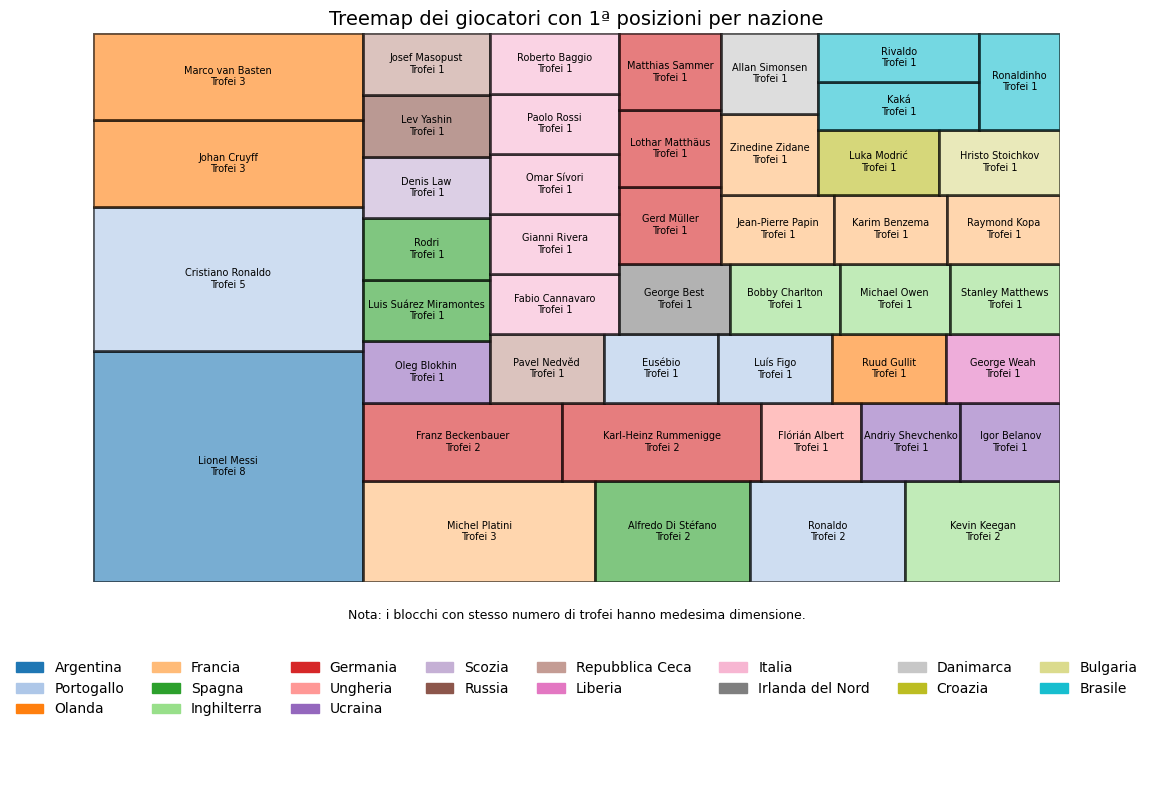

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import squarify

df_treemap = df_player_group.sort_values('count', ascending=False)

nations = df_treemap['nazionality'].unique()
color_map = {naz: plt.cm.tab20(i/len(nations)) for i, naz in enumerate(nations)}

# Crea figura con 2 subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

# Treemap
squarify.plot(
    sizes=df_treemap['count'],
    label=[f"{row['player']}\nTrofei {row['count']}" for _, row in df_treemap.iterrows()],
    color=[color_map[naz] for naz in df_treemap['nazionality']],
    alpha=0.6,
    text_kwargs={'fontsize': 7},
    edgecolor='black',
    linewidth=2,
    ax=ax1
)
ax1.set_title('Treemap dei giocatori con 1ª posizioni per nazione', fontsize=14)
ax1.axis('off')

# Legenda
patches = [mpatches.Patch(color=color_map[naz], label=naz) for naz in nations]
ax2.legend(handles=patches, loc='center', ncol=8, frameon=False)
ax2.axis('off')

# Nota
fig.text(0.5, 0.22, 'Nota: i blocchi con stesso numero di trofei hanno medesima dimensione.', 
         ha='center', fontsize=9)

plt.tight_layout()
plt.show()

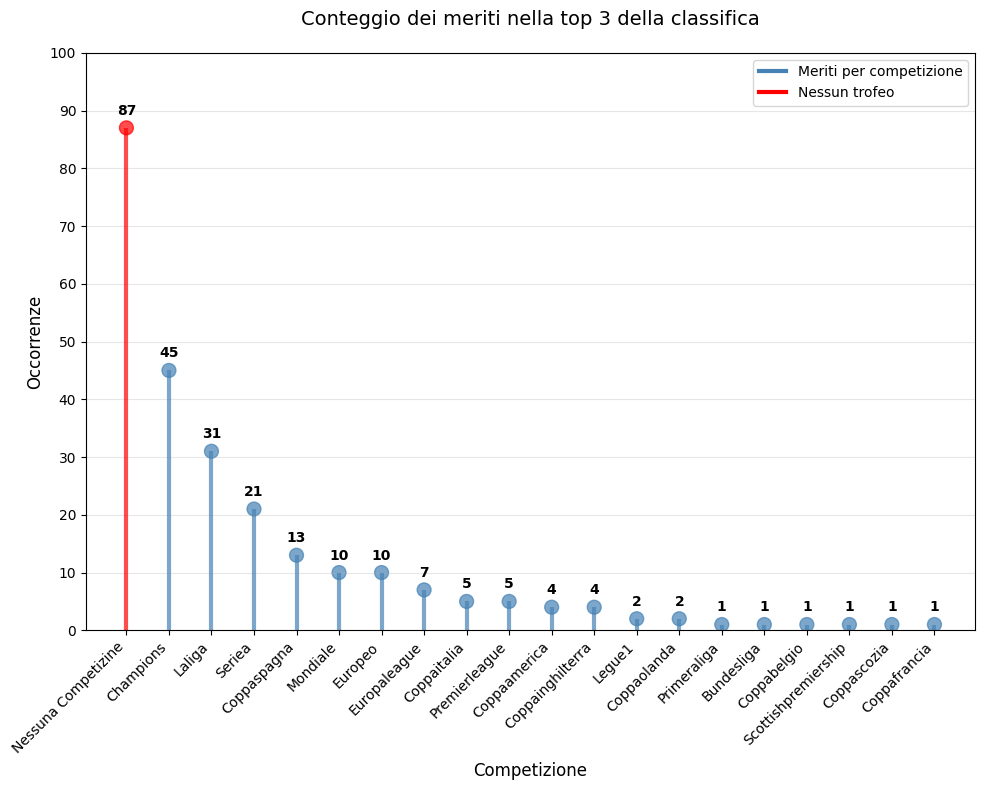

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("../Dataset/trophy_rank.csv")

# Creazione figura
fig, ax = plt.subplots(figsize=(10, 8))

# Dati
x_pos = np.arange(len(df))
values = df['total']

# Colori: rosso per nessun_trofeo, blu per gli altri
colors = ['red' if trophy == 'Nessuna Competizine' else 'steelblue' for trophy in df['trophy']]

# Grafico con linee verticali e punti
ax.vlines(x_pos, 0, values, colors=colors, alpha=0.7, linewidth=3)
ax.scatter(x_pos, values, s=100, color=colors, alpha=0.7)

# Etichette sui punti
for i, value in enumerate(values):
    ax.text(i, value + max(values) * 0.02, f'{value}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Configurazione assi
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_xticks(x_pos)
ax.set_xticklabels(df['trophy'], rotation=45, ha='right')

# Etichette e titolo
ax.set_ylabel('Occorrenze', fontsize=12)
ax.set_xlabel('Competizione', fontsize=12)
ax.set_title('Conteggio dei meriti nella top 3 della classifica', fontsize=14, pad=20)

# Styling
ax.grid(axis='y', alpha=0.3)

# Leggenda manuale
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='steelblue', lw=3, label='Meriti per competizione'),
                   Line2D([0], [0], color='red', lw=3, label='Nessun trofeo')]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()